# Simple Quantum Algorithms (and Key Concepts)

- #### Hands-on Experiential Learning <font color="red">for the Software Engineer</font>

![qc-banner](img/simple-quantum-algorithms.png "qc-banner")

<BR>

<font color="red">**Notice**</font>: All materials herein were <font color="red">**curated**</font> by **Matthew R. Versaggi (profversaggi@gmail.com)** and are released into the open source to foster growth and welfare of expanding the Quantum Computing domain - the only obligation one incurs when using, copying, distributing or referencing this is to kindly reference the author and send me an email so I know how useful the material is to you.

<font color="red">**Notice**</font>: Python Code contributions for the Circle Plots are the work of **David Radcliffe**.

![multi-qubit-entanglement-13rd](img/multi-qubit-entanglement-13rd.png "multi-qubit-entanglement-13rd")

<BR>

## Pedagogical Approach: (<font color="red">**Read this first !**</font>)

This material is intended to educate **software engineers** in certain aspects of Quantum Computing, therefore its focus will be on conveying the conceptual ideas in a form digestible to them, and supporting it with exercises to reinforce those concepts. 

Because of that pedagogical approach, **this material won't lead with or heavily leverage the concepts and language indigenous to physics and math**, but only in those terms most easily digestible to the modern software engineer.

This Jupyter Notebook is <font color="red">**not intended as a stand alone educational vehicle**</font>  - it's meant to be accompanied by a decicated power point deck that contains the main concepts to be presented by an instructor - **it is intended as a vehicle for a hands on workshop environment to facilitate learning through a guided experience.**

> **Note:-** Because of the above educational approach:
1. There is a certain amount of basic Quantum Computing knowledge that is assumed.
2. An active internet connection is **always** assumed.
3. Online references/links will be provided where appropriate
4. References to books will be made where appropriate
5. Much of this material is **dense and detailed**, the reader is <font color="red">**cautioned**</font> to be careful and slow to digest the *nuances* of the material.

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt
from Our_Qiskit_Functions import *
import cmath

## What you will be exposed to - High level: 


- Software engineers in the Quantum Computing space need to know their way around quantum algorithms, particularly how they are implemented in a classical / quantum setting, the circuit architecture that undergirds the algorithms, and how that can be implemented in a variety of simulators (QUIRK, Qiskit, QCEngine - and others) 
- Given the above, there are a host of technical concepts that need to be **<font color="red">understood experientially</font>** - we'll intentionally employ a vendor / framework agnostic approach to focus on the delivery of concept understanding and intuition procurement as the main value-add.

> ### High Level Agenda (<font color="red">*major sections*</font>): - quantum algorithms for the software engineer.
1. <font color="blue">*Quantum-Classical Relationship*</font>
2. <font color="blue">*Perfect Coin Algorithm*</font>
>> 0. <font color="red">Exercise</font> : Explore the Perfect Coin Algorithm using **Qiskit**
3. <font color="blue">*The Deutsch Algorithm*</font>
>> 0. <font color="red">Exercise</font> : Explore the Deutsch's algorithm - Classical Approach using **PYTHON**
>> 0. <font color="red">Exercise</font> : Explore the Deutsch's algorithm - with oracle having **Constant** function
>> 0. <font color="red">Exercise</font> : Explore the Deutsch's algorithm - with oracle having **Balanced** function
>> 0. <font color="red">Exercise</font> : Explore the Deutsch's algorithm - **Qiskit**
>> 0. <font color="red">Exercise</font> : Explore the Deutsch's algorithm - **QCEngine**
4. <font color="blue">*The Deutsch-Josza Algorithm*</font>
>> 0. <font color="red">Exercise</font> : Deutsch-Jozsa Algorithm w/Oracle **(CONSTANT)** function **(w/QUIRK)**
>> 0. <font color="red">Exercise</font> : Deutsch-Jozsa Algorithm w/Oracle **(BALANCED)** function **(w/QUIRK)**
>> 0. <font color="red">Exercise</font> : Deutsch-Jozsa Algorithm with **Qiskit**
>> 0. <font color="red">Exercise</font> : Deutsch-Jozsa Algorithm with **QCEngine**
5. <font color="blue">*CPhase (and its Representations)*</font>
>> 0. <font color="red">Exercise</font> : CPhase Implementation **(QCEngine)**
>> 0. <font color="red">Exercise</font> : CPhase Implementation **(QUIRK)**
6. <font color="blue">*Phase Kickback*</font>
>> 0. <font color="red">Exercise</font> : Phase Kickback Trick **(QCEngine)**
>> 0. <font color="red">Exercise</font> : Phase Kickback Trick **(QUIRK)**
7. <font color="blue">*Phase Logic*</font>
>> 0. <font color="red">Exercise</font> : Phase Logic **(QCEngine)**
>> 0. <font color="red">Exercise</font> : Phase Logic **(QUIRK)**
8. <font color="blue">*Amplitude ("Magnitude")Amplification*</font>
>> 0. <font color="red">Exercise</font> : Amplitude ("Magnitude")  Amplification **(QCEngine)**
>> 0. <font color="red">Exercise</font> : Iterative Amplitude ("Magnitude")  Amplification **(QCEngine)**
9. <font color="blue">*Quantum Fourier Transform   ("QFT")*</font>
>> 0. <font color="red">Exercise</font> : Quantum Fourier Transform ("QFT") - **QCEngine**


## Background Videos: 

Quantum Computing Concepts - **Quantum Hardware**

- https://www.youtube.com/watch?v=BbozLeSxcZ4&list=PLHSIfioizVW2uC27IFkHlSc-NgvZjBliZ&index=9


Quantum Computing Concepts - **Quantum Algorithms**
- https://www.youtube.com/watch?v=8anVNc0r_8o&list=PL50XnIfJxPDWDyea8EbbLe8GHfXkWU7W_&index=8&t=0s

## <font color="red">Developmental Detour</font> : Explore the <font color="blue">Quantum-Classical Relationship</font> 

<BR>

![architecture-quantum-gate](img/architecture-quantum-gate.png "architecture-quantum-gate")

<BR>

> #### The Classical - Quantum : function call relationship

![architecture-classical-quantum](img/architecture-classical-quantum.png "architecture-classical-quantum")

### <font color="red">REMINDER</font>:- <font color="blue">The Anatomy of the QISKIT Quantum Simulator </font>

<BR>

![Qiskit-Process](img/Qiskit-Process1.png "Qiskit-Process")

#  <font color="blue">Perfect Coin Algorithm</font> - the warmup !

![quantum-coin-flip](img/quantum-coin-flip.png "quantum-coin-flip")

> ### Why does this work?
- Because at the Quantum Level, a **simple Hadamard gate** is a truely unpredictible 50/50 chance operation - whereas with a digital random number generator, it is possible (if you knew the long sequence) to predict the next number in the sequence.

### <font color="red">Exercise</font> : Explore the Perfect Coin Algorithm using Qiskit.
- Run and re-run the algorithm and observe it's behavior and structure.

In [8]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, Aer, execute
import numpy as np
import math as m
import scipy as sci

S_simulator = Aer.backends(name='statevector_simulator')[0]
M_simulator = Aer.backends(name='qasm_simulator')[0] 


In [9]:

#Displaying Results 
def Wavefunction( obj , *args, **kwargs):
#Displays the waveftmction of the quantum system 
	if(type(obj) == QuantumCircuit ):
		statevec = execute( obj, S_simulator, shots=1 ).result().get_statevector()
	if(type(obj) == np.ndarray):
		statevec = obj
	sys = False
	NL = False
	dec = 5
	if 'precision' in kwargs:
		dec = int( kwargs['precision'] )
	if 'column' in kwargs:
		NL = kwargs['column']
	if 'systems' in kwargs:
		systems = kwargs['systems']
		sys = True
		last_sys = int(len(systems)-1)
		show_systems = []
		for s_chk in np.arange(len(systems)):
			if( type(systems[s_chk]) != int ):
				raise Exception('systems must be an array of all integers')
		if 'show_systems' in kwargs:
			show_systems = kwargs['show_systems']
			if( len(systems)!= len(show_systems) ):
				raise Exception('systems and show_systems need to be arrays of equal length')
			for ls in np.arange(len(show_systems)):
				if((show_systems[ls] != True) and (show_systems[ls] != False)):
					raise Exception('show_systems must be an array of Truth Values')
				if(show_systems[ls] == True):
					last_sys = int(ls) 
		else:
			for ss in np.arange(len(systems)):
				show_systems.append(True)
	wavefunction = ''
	qubits = int(m.log(len(statevec),2))
	for i in np.arange( int(len(statevec))):
		#print(wavefunction)
		value = round(statevec[i].real, dec) + round(statevec[i].imag, dec) * 1j
		if( (value.real != 0) or (value.imag != 0)):
			state = list(Binary(int(i),int(2**qubits)))
			state.reverse()
			state_str = ''
			#print(state)
			if( sys == True ): #Systems and SharSystems 
				k = 0 
				for s in np.arange(len(systems)):
					if(show_systems[s] == True):
						if(int(s) != last_sys):
							state.insert(int(k + systems[s]), '>|' )
							k = int(k + systems[s] + 1)
						else:
							k = int(k + systems[s]) 
					else:
						for s2 in np.arange(systems[s]):
							del state[int(k)]
			for j in np.arange(len(state)):
				if(type(state[j])!= str):
					state_str = state_str + str(int(state[j])) 
				else:
					state_str = state_str + state[j]
			#print(state_str)
			#print(value)
			if( (value.real != 0) and (value.imag != 0) ):
				if( value.imag > 0):
					wavefunction = wavefunction + str(value.real) + '+' + str(value.imag) + 'j |' + state_str + '>   '
				else:
					wavefunction = wavefunction + str(value.real) + '' + str(value.imag) + 'j |' + state_str +  '>   '
			if( (value.real !=0 ) and (value.imag ==0) ):
				wavefunction = wavefunction  + str(value.real) + '  |' + state_str + '>   '
			if( (value.real == 0) and (value.imag != 0) ):
				wavefunction = wavefunction + str(value.imag)  + 'j |' + state_str + '>   '
			if(NL):
				wavefunction = wavefunction + '\n'
		#print(NL)
	
	#print(wavefunction)
	return wavefunction


def Measurement(quantumcircuit, *args, **kwargs): 
	#Displays the measurement results of a quantum circuit 
	p_M = True
	S = 1
	ref = False
	NL = False
	if 'shots' in kwargs:
		S = int(kwargs['shots'])
	if 'return_M' in kwargs:
		ret = kwargs['return_M']
	if 'print_M' in kwargs:
		p_M = kwargs['print_M']
	if 'column' in kwargs:
		NL = kwargs['column']
	M1 = execute(quantumcircuit, M_simulator, shots=S).result().get_counts(quantumcircuit)
	M2 = {}
	k1 = list(M1.keys())
	v1 = list(M1.values())
	for k in np.arange(len(k1)):
		key_list = list(k1[k])
		new_key = ''
		for j in np.arange(len(key_list)):
			new_key = new_key+key_list[len(key_list)-(j+1)]
		M2[new_key] = v1[k]
	if(p_M):
		k2 = list(M2.keys())
		v2 = list(M2.values())
		measurements = ''
		for i in np.arange(len(k2)):
			m_str = str(v2[i])+'|'
			for j in np.arange(len(k2[i])):
				if(k2[i][j] == '0'):
					m_str = m_str + '0' 
				if(k2[i][j] == '1'):
					m_str = m_str + '1'
				if( k2[i][j] == ' ' ):
					m_str = m_str +'>|'
			m_str = m_str + '>   '
			if(NL):
				m_str = m_str + '\n'
			measurements = measurements + m_str
		#print(measurements)
		return measurements
	if(ref):
		return M2


#Math Operations
def Oplus(bit1,bit2): 
	'''Adds too bits of O's and 1's (modulo 2)'''
	bit = np.zeros(len(bit1))
	for i in np.arange( len(bit) ):
		if( (bit1[i]+bit2[i])%2 == 0 ):
			bit[i] = 0
		else: 
			bit[i] = 1
	return bit 


def Binary(number,total): 
#Converts a number to binary, right to left LSB 152 153 o
	qubits = int(m.log(total,2))
	N = number
	b_num = np.zeros(qubits)
	for i in np.arange(qubits):
		if( N/((2)**(qubits-i-1)) >= 1 ):
			b_num[i] = 1
			N = N - 2 ** (qubits-i-1)
	B = [] 
	for j in np.arange(len(b_num)):
		B.append(int(b_num[j]))
	return B

def From_Binary(s):
    num = 0
    for i in np.arange(len(s)):
        num = num + s[int(0-(i+1))] * 2 ** (i)
    return num

def B2D(in_bi):
    len_in = len(in_bi)
    in_bi = in_bi[::-1]
    dec = 0
    for i in range(0,len_in):
        if in_bi[i] != '0':
            dec += 2**i
    return dec

#  Custom Gates
def x_Transformation(qc, qreg, state): 
#Tranforms the state of the system, applying X gates according to as in the vector 'state' 
	for j in np.arange(len(state)):
		if( int(state[j]) == 0 ):
			qc.x( qreg[int(j)] ) 


def n_NOT(qc, control, target, anc): 
#performs an n-NOT gate
	n = len(control)
	instructions = []
	active_ancilla = []
	q_unused = []
	q = 0
	a = 0
	while( (n > 0) or (len(q_unused) != 0) or (len(active_ancilla) != 0) ):
		if( n > 0 ):
			if( (n-2) >= 0 ):
				instructions.append( [control[q], control[q+1], anc[a]] )
				active_ancilla.append(a)
				a += 1
				q += 2
				n = n - 2
			if( (n-2) == -1 ):
				q_unused.append( q )
				n = n - 1
		elif( len(q_unused) != 0 ):
			if(len(activeancilla)!=1):
				instructions.append( [control[q], anc[active_ancilla[0]], anc[a]] )
				del active_ancilla[0]
				del q_unused[0]
				active_ancilla.append(a)
				a = a + 1
			else:
				instructions.append( [control[q], anc[active_ancilla[0]], target] )
				del active_ancilla[0]
				del q_unused[0]
		elif( len(active_ancilla) != 0 ):
			if( len(active_ancilla) > 2 ):
				instructions.append( [anc[active_ancilla[0]], anc[active_ancilla[1]], anc[a]] )
				active_ancilla.append(a)
				del active_ancilla[0]
				del active_ancilla[0]
				a = a + 1
			elif( len(active_ancilla) == 2):
				instructions.append([anc[active_ancilla[0]], anc[active_ancilla[1]], target])
				del active_ancilla[0]
				del active_ancilla[0]
	for i in np.arange( len(instructions) ):
		qc.ccx( instructions[i][0], instructions[i][1], instructions[i][2] )
	del instructions[-1]
	for i in np.arange( len(instructions) ):
		qc.ccx( instructions[0-(i+1)][0], instructions[0-(i+1)][1], instructions[0-(i+1)][2] )



def Control_Instruction( qc, vec ): 
#Ammends the proper quantum circuit instruction based on the input 'vec'
#Used for the function 'n_Control_U
	if( vec[0] == 'X' ):
		qc.cx( ver[1], vec[2] )
	if( vec[0] == 'Z' ):
		qc.cz( ver[1], vec[2] )
	if( vec[0] == 'PRASE' ):
		qc.cu1( vec[2], vec[1], vec[3] )
	if( vec[0] == 'SWAP' ):
		qc.cswap( vec[1], vec[2], vec[3] ) 

def X_Transformation(qc, qreg, state):
	for j in np.arange(len(state)):
		if( int(state[j]) == 0):
			qc.x( qreg[int(j)])



def sinmons_solver(E,N):
	'''Returns an array of s_prime candidates
	'''
	s_primes = []
	for s in np.ararge(1,2**N):
		sp = Binary( int(s), 2**N )
		candidate = True
		for e in np.arange( len(E) ):
			value = 0
			for i in np.arange( N ):
				value = value + sp[i]*E[e][i]
			if(value%2==1):
				candidate=False
		if(candidate):
			s_primes.append(sp)
	return s_primes


def Grover_Oracle(mark, qc, q, an1, an2): 
	'''
	picks out the marked state and applies a negative phase 
	'''
	qc.h( an1[0] )
	X_Transformation(qc, q, mark)
	if( len(mark) > 2 ):
		n_NOT( qc, q, an1[0], an2 )
	if( len(mark) == 2 ):
		qc.ccx( q[0], q[1], an1[0] )
	X_Transformation(qc, q, mark)
	qc.h( an1[0] )

def Grover_Diffusion(mark, qc, q, an1, an2): 
	'''
	ammends the instructions for a Grover Diffusion Operation to the Quartu rcuit
	'''
	zeros_state = []
	for i in np.arange( len(mark) ):
		zeros_state.append( 0 )
		qc.h( q[int(i)] )
	Grover_Oracle(zeros_state, qc, q, an1, an2)
	for j in np.arange( len(mark) ):
		qc.h( q[int(j)] )



def Grover(Q, marked): 
	'''
	Amends all the instructions for a Grover Search 
	'''
	q = QuantumRegister(Q,name='q')
	an1 = QuantumRegister(1,name='anc')
	an2 = QuantumRegister(Q-2,name='nanc')
	c = ClassicalRegister(Q,name='c')
	qc = QuantumCircuit(q,an1,an2,c,name='qc')
	for j in np.arange(Q):
		qc.h( q[int(j)] )
	qc.x( an1[0] )
	iterations = round( m.pi/4 * 2**(Q/2.0) )
	for i in np.arange( iterations ):
		Grover_Oracle(marked, qc, q, an1, an2)
		Grover_Diffusion(marked, qc, q, an1, an2)
	return qc, q, an1, an2, c

In [10]:
#import qiskit
#from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt
#from Our_Qiskit_Functions import *
import cmath

## Uncomment the next line to see diagrams when running in a notebook
%matplotlib inline



In [12]:

#
# Quantum Coin Flip Function
#

def Quantum_Coin_Flip(flips):
    # Simulate a perfect coin, measuring heads or tails, using a qubit
    q = QuantumRegister(1)
    c = ClassicalRegister(1)
    perfect_coin = QuantumCircuit(q,c)
    
    
    # H gate assures perfectly 50/50 randomness 
    #
    perfect_coin.h(q[0])
    perfect_coin.measure(q,c)
    
    
    M = execute(perfect_coin, M_simulator, shots=flips).result().get_counts(perfect_coin)
    
    heads = M['0']
    tails = M['1']
    
    return heads, tails    
    
#
# Helper Function to determine Winner
#

def determine_winner(Heads, Tails):
    if (Heads > Tails):
        print("Heads Wins!")
    if (Heads < Tails):
        print("Tails Wins!")
    if (Heads == Tails):
        print("Tie - no Winner!")

    print("\n")
    print("Final Score: Heads: ", Heads, " Tails: ", Tails)
    

#### Re-Run this segment to get random coin flips.

In [13]:
# Call the Quantum Coin Flip Function
#
Heads, Tails = Quantum_Coin_Flip(100)


# Determine Winner and Display
#
determine_winner(Heads, Tails)
    

Heads Wins!


Final Score: Heads:  55  Tails:  45


In [14]:
Heads, Tails = Quantum_Coin_Flip(100)
determine_winner(Heads, Tails)

Heads Wins!


Final Score: Heads:  57  Tails:  43


In [15]:
Heads, Tails = Quantum_Coin_Flip(100)
determine_winner(Heads, Tails)

Tails Wins!


Final Score: Heads:  48  Tails:  52


In [16]:
Heads, Tails = Quantum_Coin_Flip(100)
determine_winner(Heads, Tails)

Heads Wins!


Final Score: Heads:  56  Tails:  44


In [23]:
Heads, Tails = Quantum_Coin_Flip(10000000)
determine_winner(Heads, Tails)

Heads Wins!


Final Score: Heads:  5000462  Tails:  4999538


# <font color="blue">The Deutsch Algorithm</font>
- ### <font color="red">Find the nature of the Oracle </font>


![Deutsch-Circuit_Banner](img/Deutsch-Circuit_Banner.png "Deutsch-Circuit_Banner")

<BR>
    
![Deutsch-PhaseKickBack](img/Deutsch-PhaseKickBack.png "Deutsch-PhaseKickBack") 
    
<BR>
    
![DeutschAlgorithm-Q_vs_C](img/DeutschAlgorithm-Q_vs_C.png "DeutschAlgorithm-Q_vs_C")


> **VIDEO**: https://www.youtube.com/watch?v=a7Ed7FiBwfw&list=PLsedzcQz4wyXEco2GzCoXT8MPJUrQbBx8

Suppose we are given a 'black box function' $f$.  By this we mean that we are given some function $f$, which we can use, but we don't know its effect.  Specifically, $f$ acts on a bit of information, either $0$ or $1$, and returns an output, also either $0$ or $1$.  Thus, when we feed $f$ the inputs $0$ and $1$, the function will be describable by **two** out of the **four** following possibilities:

$$ f(0) \rightarrow 0 \hspace{.5cm} f(0) \rightarrow 1 $$

$$ f(1) \rightarrow 0 \hspace{.5cm} f(1) \rightarrow 1 $$

Based on these possibilities, we can say that $f$ is guarenteed to be either a **'balanced'** or **'constant'** function. 

> A balanced function means that $f$'s outputs will be half $0$'s and half $1$'s, ex: $\hspace{.15cm} f(0) \rightarrow 1 \hspace{.35cm} f(1) \rightarrow 0 $.  

> A constant function means that the output will be either all $0$'s or all $1$'s, ex: $\hspace{.15cm} f(0) \rightarrow 1 \hspace{.35cm} f(1) \rightarrow 1 $.  

So then, given this mysterious $f$, **what is the minimum number of uses** by which we can determine whether it is a balanced or constant function?

### Problem: 

> The hidden function **Bf()**  returns either a **Constant** (everything returned is the SAME: all 1's or all 0's), or a **Balanced** (SAME amount of 1's and 0's returned).
- Design a solution that can determine (with absolute certainty) that the function **Bf()** is either **Constant** or **Balanced** in the **<font color="red">fewest queries of the oracle as possible</font>**.

## **<font color="blue">Classical Approach</font>** - The Deutsch Algorithm
- https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm
- *Although of little practical use*, it is one of the **first examples of a quantum algorithm that is exponentially faster than any possible deterministic classical algorithm** and is the inspiration for Simon's Algorithm, which is, in turn, the inspiration for Shor's Algorithm.


![Deutsch-Algorithm-Classical](img/Deutsch-Algorithm-Classical.png "Deutsch-Algorithm-Classical")

<BR>

> This code randomly generates **one** of the **<font color="red" size="4">four</font>** possible black box functions, tests it with **<font color="red">two</font>** inputs **f(0)** and **f(1)**, and concludes whether the function **Bf(·)**  is **balanced** or **constant** <font color="red">based on the results</font>. 


![Deutsch-Query-Classic](img/Deutsch-Query-Classic1.png "")

### <font color="red">Exercise</font> : Explore the Deutsch's algorithm - <font color="blue">Classical</font> Approach (using PYTHON).

In [25]:
#
# The Classical Function
#

import math as m
import scipy as sci
import numpy as np


def blackbox_f():
    # Returns on of four possible f functions
    
    def F1(x):
        return 0
    
    def F2(x):
        return 1
    
    def F3(x):
        return x%2
    
    def F4(x):
        return (x+1)%2
    
    functions = [F1, F2, F3, F4]
    
    # Random number generator provides a different function
    #
    f = functions[ int(m.floor( 4*np.random.rand() ) ) ]
    
    return f


def classical_determine_hidden_function_(F0, F1):
    
    # Display F with two inputs
    #
    print("f(0): ", F0 ) 
    print("f(1): ", F1 ) 
    
    # Then make the conclusion
    #
    if ( F0 == F1 ):
        print("Conclusion: F is CONSTANT")
    else:
        print("Conclusion: F is BALANCED")

### **<font color="red">NOTE</font>**: - Two <font color="blue">Classical</font> calls required
- The classical approach required **<font color="red">two</font>** calls to the function to determine it's nature (**constant or balanced**)
- **F(0), F(1)**

In [48]:
for i, j in [(1, 2), (3, 4), (5, 6),(7, 8)]:
    print(i, j)
    # Get the Classical BlackBox Function
    # f = [F1, F2, F3, F4] as defined above.
    F = blackbox_f()
    # Determine the Functions Nature (two calls F(0) and f(1) )
    classical_determine_hidden_function_(F(0), F(1))
    


1 2
f(0):  1
f(1):  1
Conclusion: F is CONSTANT
3 4
f(0):  0
f(1):  0
Conclusion: F is CONSTANT
5 6
f(0):  0
f(1):  1
Conclusion: F is BALANCED
7 8
f(0):  1
f(1):  1
Conclusion: F is CONSTANT


# <font color="blue">Quantum Approach</font> - The Deutsch Algorithm
- ### <font color="red">Find the nature of the Oracle </font>

<BR>

> ### A useful property of this black-box operator is called **<font color="red">phase kickback</font>**
- When given a particular type of input to this operator, the hidden function **Bf(·)** appears in the **phase** of the output
- *This concept is covered later in detail*



![Deutsch-Query-Quantum](img/Deutsch-Query-Quantum.png "Deutsch-Query-Quantum")


> ### **<font color="Blue">Quantum Solution</font>**   
- Using a quantum computer, we can solve this problem with 100% confidence after only **<font color="red">one</font>** call to the function  **f(x)** 
- provided we have the function  **<font color="red" size="5">f()</font>**  implemented as a  **<font color="red">quantum oracle</font>**.

> ### **<font color="Blue">Why does the Quantum approach work</font>**? A QUIRK<font color="red">ey</font> Explanation.
- Why does it only take **ONE** invocation of the algorithm instead of two?
- #### In a nutshell, "Superposition and Phase Kickback".
>> https://www.youtube.com/watch?v=WLcNrikK2vw


### <font color="blue">The Example Setup</font> : ( a slight deviation from the original Deutsch Algorithm )
- No Phase Kickback in this version
- For **<font color="red">Constant</font>** Oracle Functions use the **ID Gate** or the **NOT gate** to return **Constant** output.
- For **<font color="red">Balanced</font>** Oracle Functions use the **CNOT (and inverse CNOT) gates** to return **Balanced** output. 

> When the hidden Boolean function **(Oracle)** is **<font color="red">Constant</font>**, the circuit returns a measurement result of **<font color="red">(0 1)</font>**.
- Ignore the Phase.



> When the hidden Boolean function **(Oracle)** is **<font color="red">Balanced</font>**, the circuit returns a measurement result of **<font color="red">(1 1)</font>**.
- Ignore the Phase.



## <font color="blue">QisKit Circuits</font>

### Deutsch <font color="red">Constant Oracle</font> Circuit

![Deutsch-Constant_circuit](img/Deutsch-Constant_circuit.png "Deutsch-Constant_circuit")

<BR>
    
### Deutsch <font color="red">Balanced Oracle</font> Circuit

![Deutsch-Balanced_curcuit](img/Deutsch-Balanced_curcuit.png "Deutsch-Balanced_curcuit")

## <font color="blue">QUIRK Circuits</font>

![Deutsch-OneQuery2](img/Deutsch-OneQuery3.png "")

### <font color="red">Exercise</font> : Using the <font color="blue">QUIRK</font> to explore (a slight <font color="red">deviation</font> of) the <font color="blue">Deutsch Algorithm</font>
- Experiment with the **<font color="red">Constant</font>** Oracle Function using the **ID Gate** or the **NOT gate** to return **Constant** output.
- Experiment with the **<font color="red">Balanced</font>** Oracle Function using the **CNOT (and inverse CNOT) gates** to return **Balanced** output. 




> #### Look for:
- Balanced (1,1)
- Constant (0,1)

In [62]:
#  Constant 0,1:
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit=%7B%22cols%22%3A%5B%5B1%2C%22X%22%5D%2C%5B%22Chance%22%2C%22Chance%22%5D%2C%5B%22H%22%2C%22H%22%5D%2C%5B%22Amps2%22%5D%2C%5B%5D%2C%5B%22%E2%80%A6%22%2C%22%E2%80%A6%22%5D%2C%5B%22%E2%80%A6%22%2C%22%E2%80%A6%22%5D%2C%5B%22Amps2%22%5D%2C%5B%5D%2C%5B%22H%22%2C%22H%22%5D%2C%5B%22Measure%22%2C%22Measure%22%5D%2C%5B%22Amps1%22%5D%5D%7D', width=900, height=600)

In [63]:
# Constant 0,1
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit=%7B%22cols%22%3A%5B%5B1%2C%22X%22%5D%2C%5B%22Chance%22%2C%22Chance%22%5D%2C%5B%22H%22%2C%22H%22%5D%2C%5B%22Amps2%22%5D%2C%5B%5D%2C%5B%22%E2%80%A6%22%2C%22%E2%80%A6%22%5D%2C%5B1%2C%22X%22%5D%2C%5B%22%E2%80%A6%22%2C%22%E2%80%A6%22%5D%2C%5B%22Amps2%22%5D%2C%5B%5D%2C%5B%22H%22%2C%22H%22%5D%2C%5B%22Measure%22%2C%22Measure%22%5D%2C%5B%22Amps1%22%5D%5D%7D', width=900, height=600)

In [58]:
# Balanced 1 1
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit=%7B%22cols%22%3A%5B%5B1%2C%22X%22%5D%2C%5B%22Chance%22%2C%22Chance%22%5D%2C%5B%22H%22%2C%22H%22%5D%2C%5B%22Amps2%22%5D%2C%5B%5D%2C%5B%22%E2%80%A6%22%2C%22%E2%80%A6%22%5D%2C%5B%22%E2%80%A2%22%2C%22X%22%5D%2C%5B%22%E2%80%A6%22%2C%22%E2%80%A6%22%5D%2C%5B%22Amps2%22%5D%2C%5B%5D%2C%5B%22H%22%2C%22H%22%5D%2C%5B%22Measure%22%2C%22Measure%22%5D%2C%5B%22Amps1%22%5D%5D%7D', width=900, height=600)

In [65]:
#Balanced 1 1
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit=%7B%22cols%22%3A%5B%5B1%2C%22X%22%5D%2C%5B%22Chance%22%2C%22Chance%22%5D%2C%5B%22H%22%2C%22H%22%5D%2C%5B%22Amps2%22%5D%2C%5B%5D%2C%5B%22%E2%80%A6%22%2C%22%E2%80%A6%22%5D%2C%5B%22%E2%97%A6%22%2C%22X%22%5D%2C%5B%22%E2%80%A6%22%2C%22%E2%80%A6%22%5D%2C%5B%22Amps2%22%5D%2C%5B%5D%2C%5B%22H%22%2C%22H%22%5D%2C%5B%22Measure%22%2C%22Measure%22%5D%2C%5B%22Amps1%22%5D%5D%7D', width=900, height=600)

### <font color="red">Discussion</font> : Using the <font color="blue">QUIRK</font> to explore (the original version of) the <font color="blue">Deutsch Algorithm</font>
- ## Incorporate the <font color="red">Phase Kickback Trick</font>
- ### <font color="red">Find the nature of the Oracle </font>


<BR><BR>
    
![Deutsch-Circuit_Banner](img/Deutsch-Circuit_Banner.png "Deutsch-Circuit_Banner")

<BR>
    

### <font color="blue">The Deutsch Oracle behavior</font>: 

> ### **<font color="blue">CONSTANT</font>**
- The phase (after the oracle) **"kicks back"** and creates **constructive interference**, which provides **100% probability** of measurement **<font color="red">ZERO</font>** (OFF State).
- Image show a 100% chance of **|0>** (Decimal ZERO) being measured.
- **Notice:** - The phase changes in Qubit ONE (they are kicked back).

<BR><BR>

![Deutsch-Constant-QUIRK](img/Deutsch-Constant-QUIRK1.png "")

<BR><BR>
    
> ### **<font color="blue">BALANCED</font>**
- The phase (after the oracle) **"kicks back"** and creates **constructive interference**, which provides **100% probability** of measurement **<font color="red">ONE</font>** (ON State).
- Image show a 0% chance of **|0>** (Decimal ZERO) being measured.
- Conversly a 100% chance of **|1>** (Decimal ONE) being measured.
- **Notice:** - The phase changes in Qubit ONE (they are kicked back).
<BR><BR>

![Deutsch-Balanced-QUIRK](img/Deutsch-Balanced-QUIRK1.png "")

### <font color="red">Exercise</font> : Explore the Deutsch's algorithm - with oracle having <font color="red">Constant</font> function

- Experiment with the **<font color="red">Constant</font>** Oracle Function using the **ID Gate** or the **NOT gate** to return **Constant** output.


In [67]:
# QUIRK (Quantum Curcuit Simulator) : Deutsch's algorithm - with oracle having CONSTANT function.
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[1,%22X%22],[%22Chance%22,%22Chance%22],[%22H%22,%22H%22],[%22Amps2%22],[],[%22%E2%80%A6%22,%22%E2%80%A6%22],[1,%22X%22],[%22%E2%80%A6%22,%22%E2%80%A6%22],[%22Amps1%22],[],[%22H%22],[%22Measure%22],[%22Amps1%22]]}', width=900, height=600)

### <font color="red">Exercise</font> :  Explore the Deutsch's algorithm - with oracle having <font color="red">Balanced</font> function
- Experiment with the **<font color="red">Balanced</font>** Oracle Function using the **CNOT (and inverse CNOT) gates** to return **Balanced** output. 


In [68]:
# QUIRK (Quantum Curcuit Simulator) : Deutsch's algorithm - with oracle having BALANCED function.
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit=%7B%22cols%22%3A%5B%5B1%2C%22X%22%5D%2C%5B%22H%22%2C%22H%22%5D%2C%5B%22Amps2%22%5D%2C%5B%5D%2C%5B%22%E2%80%A6%22%2C%22%E2%80%A6%22%5D%2C%5B%22%E2%80%A2%22%2C%22X%22%5D%2C%5B%22%E2%80%A6%22%2C%22%E2%80%A6%22%5D%2C%5B%22Amps1%22%5D%2C%5B%5D%2C%5B%22H%22%5D%2C%5B%22Measure%22%5D%2C%5B%22Amps1%22%5D%5D%2C%22gates%22%3A%5B%7B%22id%22%3A%22~rkp5%22%2C%22name%22%3A%22Bal%22%2C%22circuit%22%3A%7B%22cols%22%3A%5B%5B%22%E2%80%A2%22%2C1%2C1%2C%22X%22%5D%5D%7D%7D%2C%7B%22id%22%3A%22~fju5%22%2C%22name%22%3A%22Con%22%2C%22circuit%22%3A%7B%22cols%22%3A%5B%5B1%2C1%2C1%2C%22X%22%5D%5D%7D%7D%5D%7D', width=900, height=600)

## <font color="red">Exercise</font> :  Explore the Deutsch's Algorithm - <font color="blue">Qiskit</font>
- Toggle the Oracle between **<font color="red">"B"</font>** (*balanced*) and **<font color="red">"C"</font>** (*constant*)
- Observe the behavior of the Algorithm.
- Note the changes in the circuit.

### <font color="blue">Quantum Advantage</font> :  
- As you toggle the Oracle between **<font color="red">"B"</font>** and **<font color="red">"C"</font>** - the Quantum Approach finds the nature of the Oracle in **<font color="red">ONE</font>** call.

### Deutsch <font color="red">Constant Oracle</font> Circuit

![Deutsch-Constant_circuit](img/Deutsch-Constant_circuit.png "Deutsch-Constant_circuit")

<BR>
    
### Deutsch <font color="red">Balanced Oracle</font> Circuit

![Deutsch-Balanced_curcuit](img/Deutsch-Balanced_curcuit.png "Deutsch-Balanced_curcuit")

### NOTE: Balanced: {'01'} and Constant: {'00'}

### Helper Functions
- To make things easier

In [69]:
### Helper Functions

# Convert Binary to Decimal

def binaryToDecimal(binary): 
      
    binary1 = binary 
    decimal, i, n = 0, 0, 0
    while(binary != 0): 
        dec = binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    # print(decimal)
    return decimal
    

# Determine Hidden Function (Balanced or Constant)

def quantum_determine_hidden_function_(dF):
    
    creg_value = list(dF.keys())[0]
    
    print("Measured Binary Value: ",creg_value)  
    print("Measured Decimal Value: ",binaryToDecimal(int(creg_value)),"\n")    
    
    # Then make the conclusion
    #
    if ( creg_value == '00' ):
        print("Conclusion: f is CONSTANT")
    
    else:
        print("Conclusion: f is BALANCED")

### Setup the Program
- Change the Oracle (Balanced or Constant)

In [70]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
from Our_Qiskit_Functions import *
import numpy as np

d_qr = QuantumRegister(2, name='d_qr')
d_cl = ClassicalRegister(2, name='d_cl')

d_qc = QuantumCircuit(d_qr, d_cl)


# Construct First Half of Deutsch Circuit
#
d_qc.x( d_qr[1] )
d_qc.barrier()    # Barrier
d_qc.h( d_qr[0] )
d_qc.h( d_qr[1] )

    
# Construct the Oracle:
# Set the Oracle to (b = balanced, c = continuous) - This is what you change.
#
d_oracle = "c"

    
d_qc.barrier()    # Barrier

# if balanced - construct this Oracle
if d_oracle == "b":
    d_qc.cx(d_qr[0], d_qr[1])

 # if constant - - construct this different Oracle
if d_oracle == "c":   
    d_qc.x(d_qr[1])
    
    
# Construct Second Half of Deutsch Circuit
#
d_qc.barrier()    # Barrier
d_qc.h( d_qr[0] )
d_qc.h( d_qr[1] )


# Measure the Curcuit
#
d_qc.measure(d_qr[0], d_cl[0])
# d_qc.measure(d_qr[1], d_cl[1]) => Not Necessary.
    
    
# Debugging
# d_qc.draw(output='mpl')     

### Submit the Job, Print the Circuit
> Check the Circuit returned:
- Balanced: **CNOT** Gate Oracle
- Constant: **NOT** Gate Oracle

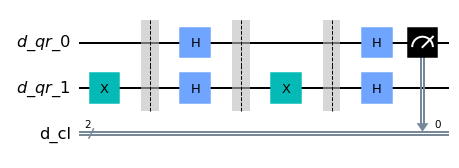

In [71]:
# Run the Program - use local simulator
#
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024

# Get Results
#
results = execute(d_qc, backend=backend, shots=shots).result()

# Result Form: Balanced: {'01': 1024} and Constant: {'00': 1024}
answer = results.get_counts()


# Print The Circuit 
d_qc.draw(output='mpl') 

### Determine the Hidden Function using only <font color="red">one</font> call.
- Balanced: Result: **(01)**
- Constant: Result: **(00)**

In [72]:
quantum_determine_hidden_function_(answer)

Measured Binary Value:  00
Measured Decimal Value:  0 

Conclusion: f is CONSTANT


## <font color="red">Exercise</font> :  Explore the Deutsch's Algorithm - <font color="blue">QCEngine</font>
- ### <font color="red">Find the nature of the Oracle </font>

<BR>

### Deutsch <font color="red">Balanced Oracle</font> Circuit (<font color="blue">ONE</font>)

![DeutschCircuit-QCEngine_B](img/DeutschCircuit-QCEngine_B.png "")


<BR><BR>
    
### Deutsch <font color="red">Constant Oracle</font> Circuit (<font color="blue">ZERO</font>)

![DeutschCircuit-QCEngine_B](img/DeutschCircuit-QCEngine_C.png "")


<BR><BR>

### Deutsch's Algorithm - QCEngine (Similar to previous circuits)
- Cut-N-Paste to examine
- Toggle between Constant and Balanced
- Notice the measurement value (0,1)
- **Point**: It only takes one pass through the circuit (not two)

In [73]:
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=14-DJ', width=900, height=900)

# <font color="blue">The Deutsch-Josza Algorithm</font>  
- ### <font color="red">Find the nature of the Oracle </font>

<BR>
    
> ## The generalized (**<font color="red">N</font>** Qubits) Case.
- Things are slightly different

![Deutsch-Joza-Banner](img/Deutsch-Joza-Banner.png "")

<BR>

![Deutsch-Joza-CallS](img/Deutsch-Jozsa-Calls.png "")

## <font color="red">Exercise</font> :  Deutsch-Jozsa Algorithm w/Oracle (<font color="blue">CONSTANT</font>) function (w/<font color="blue">QUIRK</font>)

<BR>

![Deutsch-Jozsa-Constant-Circuit-QUIRK](img/Deutsch-Jozsa-Constant-Circuit-QUIRK.png "")


<BR>

> **NOTE:**
- Observe the **100% probability** of measuring the **ZERO Ket** **<font size="5">|<font color="red">0</font>></font>** in the below circuit
- The phase kickback causes **perfect CONSTRUCTIVE interference**, which when run through H gates creates a 100% chance of measureing ZERO.
- Measuring ZERO is the indicator of a **CONSTANT** Oracle Function.
- Tinker w/the circuit to develop some intuition.

In [74]:
# QUIRK (Quantum Curcuit Simulator)
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[1,1,1,%22X%22],[%22H%22,%22H%22,%22H%22,%22H%22],[%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22],[1,1,1,%22X%22],[%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22],[%22Amps3%22],[],[%22H%22,%22H%22,%22H%22],[%22Amps3%22]],%22gates%22:[{%22id%22:%22~rkp5%22,%22name%22:%22Bal%22,%22circuit%22:{%22cols%22:[[%22%E2%80%A2%22,1,1,%22X%22]]}},{%22id%22:%22~fju5%22,%22name%22:%22Con%22,%22circuit%22:{%22cols%22:[[1,1,1,%22X%22]]}}]}', width=900, height=600)

## <font color="red">Exercise</font> :  Deutsch-Jozsa Algorithm w/Oracle (<font color="blue">BALANCED</font>) function (w/<font color="blue">QUIRK</font>)
<BR>

![Deutsch-Jozsa-Balanced-Circuit-QUIRK](img/Deutsch-Jozsa-Balanced-Circuit-QUIRK.png "")

- Obeserve the 0% probability of measuring **|0>** (anything Non-Zero) in the below circuit and tinker w/the circuit to develop some intuition.


<BR>

> **NOTE:**
- Observe the **100% probability** of measuring the **ONE Ket** **<font size="5">|<font color="red">1</font>></font>** in the below circuit
- The phase kick back creates perfect DESTRUCTIVE interference, run through the H Gate and you'll get something other than ZERO's.
- Measuring NON-ZERO is the indicator of a BALANCED Oracle Function.
- Tinker w/the circuit to develop some intuition.

In [75]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[1,1,1,%22X%22],[%22H%22,%22H%22,%22H%22,%22H%22],[%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22],[%22%E2%80%A2%22,1,1,%22X%22],[%22%E2%80%A6%22,%22%E2%80%A6%22,%22%E2%80%A6%22],[%22Amps3%22],[],[%22H%22,%22H%22,%22H%22],[%22Amps3%22]],%22gates%22:[{%22id%22:%22~rkp5%22,%22name%22:%22Bal%22,%22circuit%22:{%22cols%22:[[%22%E2%80%A2%22,1,1,%22X%22]]}},{%22id%22:%22~fju5%22,%22name%22:%22Con%22,%22circuit%22:{%22cols%22:[[1,1,1,%22X%22]]}}]}', width=900, height=600)

## <font color="red">Exercise</font> :  Deutsch-Jozsa Algorithm with <font color="blue">Qiskit</font>
- Toggle the Oracle between **"b"** and **"c"** - observe the behavior of the Algorithm.




### Deutsch <font color="red">Balanced Oracle</font> Circuit 

![DeutschCircuit-QCEngine_B](img/Deutsch-Jozsa_Qiskit_Circuit_B.png "")


<BR><BR>
    
### Deutsch <font color="red">Constant Oracle</font> Circuit 

![DeutschCircuit-QCEngine_C](img/Deutsch-Jozsa_Qiskit_Circuit_C.png "")


### Helper Functions
- Make things easier

In [76]:
def quantum_determine_hidden_function_G(F):
    
    # Print out the Classical Register Value (Binary)
    #
    for k in F:
        binary_number = ''.join(reversed(k))
        print("Measurements -> Classical Register: ", binary_number)    
    
    # Print out the Decimal Number equivalent
    #    
    decimal_Number = 0

    for key,val in F.items():
        decimal_Number = sum([(int(x) << i) for i,x in enumerate(key)])
        print('Decimal number:', decimal_Number)    
      
    print("\n")
        
    # Make the conclusion
    #
    if ( decimal_Number == 0 ):
        print("Conclusion: f is CONSTANT")
    else:
        print("Conclusion: f is BALANCED")

### Setup the Program
- Change the Oracle (Balanced or Constant)
- Observe the results

In [77]:
# initialization
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute

# import basic plot tools
from qiskit.visualization import plot_histogram   
            

# set the length of the n-bit string. 
n = 2

    
# Construct FIRST HALF of the Circuit
#
# n qubits for querying the oracle, and one qubit for storing the answer
#
djCircuit = QuantumCircuit(n+1, n)
    

# Since all qubits are initialized to |0>, 
# flip the second register qubit to the |1> state
# 
djCircuit.x(n)
djCircuit.barrier()     # Apply barrier
djCircuit.h(range(n+1)) # Apply Hadamard gates to all qubits
djCircuit.barrier()     # Apply barrier 

    
# Construct the Oracle:
# set the oracle, b for balanced, c for constant : (*** Toggle/Change this ***)
#
oracle = "c"
    
# if the oracle is balanced, set the hidden bitstring, b to decmal 3 (or 11 in binary)
if oracle == "b":
    # b = 3
    b = np.random.randint(1,2**n)  # uncomment for a random value
        

# if the oracle is constant, set c = 0 or 1 randomly.
if oracle == "c":
    # c = 1 
    c = np.random.randint(2) # uncomment for a random value
        
# Query the oracle
if oracle == "c": # if the oracle is constant, apply the appropriate gate to the circuit
    if c == 1:
        djCircuit.x(n)      # NOT gate
    else:
        djCircuit.iden(n)   # ID gate
else: 
    # otherwise, the oracle is balanced - construct a gate sequence that returns the inner product 
    # of the input with b (non-zero bitstring) 
    for i in range(n):
        if (b & (1 << i)):
            djCircuit.cx(i, n)
                
                
# Construct SECOND HALF of the Circuit
#
djCircuit.barrier()  # Apply barrier
djCircuit.h(range(n)) # Apply Hadamard gates to the first "register" after querying the oracle (q0, q1)
djCircuit.measure(range(n), range(n)) # Measure the first register (the 2nd register gets unmeasured)


# Debugging
# djCircuit.draw(output='mpl')  

### Run the program, fetch results
- Notice the changes in the circuit

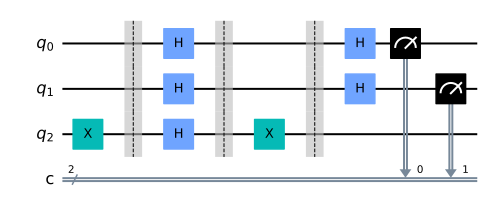

In [78]:
# Run the Program
#
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024

# Get Results
#
results = execute(djCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

# Print The Circuit 
djCircuit.draw(output='mpl') 

### Determine the Hidden Function using only <font color="red">one</font> call.
- **<font color="red">NOTE</font>:** "00" state means CONSTANT, anything else is BALANCED.
- Balanced: Result: **(X > 00)**
- Constant: Result: **(00)**

In [83]:
quantum_determine_hidden_function_G(answer)

Measurements -> Classical Register:  00
Decimal number: 0


Conclusion: f is CONSTANT


## <font color="red">Exercise</font> :  Deutsch-Jozsa Algorithm with <font color="blue">QCEngine</font>
- Toggle the Oracle between **"b"** and **"c"** - observe the behavior of the Algorithm.
- ### <font color="red">Find the nature of the Oracle </font>


<BR>

### Deutsch-Jozsa <font color="red">Balanced Oracle</font> Circuit 

![DJCircuit-QCEngine_B](img/DJCircuit-QCEngine_B.png "")

<BR>

### Deutsch-Jozsa <font color="red">Balanced Oracle</font> Circle Plots 
![DJCircuit-QCEngine_B-CPs](img/DJCircuit-QCEngine_B-CPs.png "")


    
### Deutsch-Jozsa <font color="red">Constant Oracle</font> Circuit 

![DJCircuit-QCEngine_C](img/DJCircuit-QCEngine_C.png "")

<BR>
    
### Deutsch-Jozsa <font color="red">Constant Oracle</font> Circle Plots 
![DJCircuit-QCEngine_C-CPs](img/DJCircuit-QCEngine_C-CPs.png "")

###  <font color="blue">QCEngine (Slightly Modified) Stock Deutsch-Jozsa Algorithm</font>

- Cut-N-Paste to examine
- Toggle between Constant and Balanced
- Notice the Circle Plots behavior

In [84]:
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=14-DJ', width=900, height=900)

## <font color="red">Developmental Detour</font>: -  <font color="blue">CPhase (and its Representations)</font> [CZ Gate]
- A **Two** Qubit Operation
- Like CNOT in selective Control and Execution.

    
> ### Representations:    
![cphase-representations](img/cphase-representations.png "")


<BR>

> ### Behavior:
![CPhaseBehavior](img/CPhaseBehavior.png "")


<BR>
<img style="float: center;" src="img/binary-table-0-7_excel.png">


> **NOTE**: 
- CPHASE **only acts** when it's control bit is **ONE** 
- AND .... It only affects target qubit states have a value of **ONE |1>**.
- The CZ Gate is reversible.
<BR>
    
    
### <font color="blue">Why this is important</font>:    
    
- ### CPhase employs a kind of **<font color="red">"entanglement-generating"</font>** conditional logic that has a **<font color="blue">"symmetry"</font>** between it's **inputs** such that it is **<font color="red">irrelevant</font>** which qubit is considered the  **<font color="blue">target</font>** and which qubit is considered the  **<font color="blue">control</font>**. 
  
  
- #### This is vital to understanding the topic(s) of **Phase Kickback"** and **Phase Logic**.
  

# QUIRK Implementation of C-Phase (Controlled-Z) Gate
- Move the **Z-Rotation** Gate from **Qubit 1** to **Qubit 2** and see that the phase doesn't change

In [85]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame

IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[1,%22H%22],[%22%E2%80%A2%22,%22X%22],[1,%22H%22],[%22%E2%80%A6%22,%22%E2%80%A6%22],[{%22id%22:%22Rzft%22,%22arg%22:%22pi%22}]],%22gates%22:[{%22id%22:%22~st9n%22,%22name%22:%22C-Phase%22,%22circuit%22:{%22cols%22:[[1,%22H%22],[%22%E2%80%A2%22,%22X%22],[1,%22H%22],[%22%E2%80%A6%22,%22%E2%80%A6%22],[{%22id%22:%22Rzft%22,%22arg%22:%22pi%22}]]}}]}', width=900, height=600)

In [87]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame

IFrame(src='https://algassert.com/quirk#circuit=%7B%22cols%22%3A%5B%5B1%2C%22H%22%5D%2C%5B%22%E2%80%A2%22%2C%22X%22%5D%2C%5B1%2C%22H%22%5D%2C%5B%22%E2%80%A6%22%2C%22%E2%80%A6%22%5D%2C%5B1%2C%7B%22id%22%3A%22Rzft%22%2C%22arg%22%3A%22pi%22%7D%5D%5D%2C%22gates%22%3A%5B%7B%22id%22%3A%22~st9n%22%2C%22name%22%3A%22C-Phase%22%2C%22circuit%22%3A%7B%22cols%22%3A%5B%5B1%2C%22H%22%5D%2C%5B%22%E2%80%A2%22%2C%22X%22%5D%2C%5B1%2C%22H%22%5D%2C%5B%22%E2%80%A6%22%2C%22%E2%80%A6%22%5D%2C%5B%7B%22id%22%3A%22Rzft%22%2C%22arg%22%3A%22pi%22%7D%5D%5D%7D%7D%5D%7D', width=900, height=600)

### <font color="red">Exercise</font> :  CPhase Implementation (<font color="blue">QCEngine</font>)

- Cut-N-Paste the below code into the QCEngine and run it.
- Examine the output area to gain intuition about the two representations of the CPHASE gate by clicking in the output areas and observing the behavior of the circle plots (pay attention to the phase angles)
- Note that the 90dg phase rotation on qubit 2 does nothing. **Why?**
- However the 90dg phase rotation works in qubits (1, 3).



In [ ]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=3-3', width=900, height=900)

# <font color="red">Developmental Detour</font>: -  <font color="blue">Phase Kickback</font>

> - **Definition**: When the **phases** of one register are **conditioned** upon the **values** of another register, then any phase changes executed on the one register **also affects the other registers phases** and are **cumulative** - aka, they get **"kicked back"** to the other register and **"add up"**.

    
![phase-kickback-diagram](img/phase-kickback-diagram.png "")

<BR>

<img style="float: center;" src="img/binary-table-0-7_excel.png">

### <font color="red">Exercise</font> :  Phase Kickback Trick (<font color="blue">QCEngine</font>)

- Experiment with the Program Circuit Output Display (clicking on the various points on the circuit) to see how the circle diagrams behave (for intuitions sake).
- The **Phase Degrees** should be aprox: (**0, +45, +90, +135**) for decimal numbers (**4, 5, 6 7**).


<BR>
    
![phase-kickback-trick-circle-charts](img/phase-kickback-trick-circle-charts.png "phase-kickback-trick-circle-charts")    
    
The **Relative Phase** (aka. Rotation)
- <font color="red">**Important**</font>: Phase operations <font color="red">**only**</font> rotate the circle associated with the **|1>** state and will have <font color="red">**no**</font> effect on the **|0>** state.
![circle-plot-phase-rotations](img/circle-plot-phase-rotation.png "")



### Post <font color="red">Superposition</font> of Reg #1:
![cPhaseKickBack-0dg](img/PhaseKickBack-0dg.png "")

### Post <font color="red">45dg</font> Phase Rotation of Reg #2:
![cPhaseKickBack-90dg](img/PhaseKickBack-90dg.png "")

### Post <font color="red">90dg</font> Phase Rotation of Reg #2:
![cPhaseKickBack-135dg](img/PhaseKickBack-135dg.png "")

### For sake of contrast, perform simple 45dg phase rotations on qubit 3

### Enhanced Stock Phase Kickback Example
- Note the progression from 0=>45=>90=>135 Degrees

In [ ]:
# QCEngine
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=3-3', width=1200, height=600)

## <font color="red">Exercise</font> :  Phase Kickback Trick (<font color="blue">QUIRK</font>)
- Experiment with the QUIRK Implementation to see how the phase circle diagrams behave (for intuitions sake).
- The **Phase Degrees** should be aprox: (**0, +45, +90, +135**) for decimal numbers (**4, 5, 6 7**).
- **Note** the changes in the Phase Formula for QUIRK vs QCEngine (Roughly 2X).

<BR>
    
![phase-kickback-trick-QUIRK](img/phase-kickback-trick-QUIRK2.png "")

<BR>
    

> ### REFERENCE: QUIRK C-Phases:
![QUIRK-C-Phases](img/QUIRK-C-Phases1.png "")


![cPhaseKickBack-135dg](img/PhaseKickBack-135dg.png "")

### Recreate the circuit with QUIRK
- Any Intuition around the Phase Rotations of QUIRK?

In [ ]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22%E2%80%A6%22,1,%22X%22],[%22H%22,%22H%22],[%22%E2%80%A2%22,1,{%22id%22:%22Rzft%22,%22arg%22:%22pi/2%22}],[1,%22%E2%80%A2%22,{%22id%22:%22Rzft%22,%22arg%22:%22pi%22}],[%22Amps3%22]]}', width=900, height=600)

## <font color="red">Developmental Detour</font> : -  <font color="blue">Phase Logic</font>

### <font color="blue">Why this is important</font>: 
- #### *Phase Logic* undergirds many sophisticated (and powerful) manipulations used in the construction of Quantum Algorithms.
- Phase Logic **<font color="red">encodes</font>** information into relative phases by **writing the logical value of the qubit into its phases**.
- NOTE: Phase Logic **requires** *magnitude-value* inputs and outputs **phases**.

> - **<font color="blue">Definition</font>:**: Phase Logic implements a given logic operation by **flipping the relative phases** of *values* in a register for which the *operation* would return a **ONE** value.


![PhaseLogic-Explanation](img/PhaseLogic-Explanation.png "")


<BR>


![tt-or](img/tt-or.png "")


### <font color="blue">Phase Logic OperatorsFor Clarity Sake</font>

![phase-logic-tips](img/phase-logic-tips.png "")
    

<BR>
    
### <font color="blue">Phase Logic Operators</font>
    
![phase-logic-gate-results](img/phase-logic-gate-results.png "")

<BR>

### <font color="blue">Phase Logic Circuit Gates</font>
![phase-logic-gates](img/phase-logic-gates.png "")
    




### <font color="blue">Phase Logic is different than Quantum Digital Logic</font>

![digital-logic-gates-cnots](img/digital-logic-gates-cnots.png "")

<BR>

### <font color="blue">For Reference: Digital Logic Truth Tables</font>

|Gate|Gate|
|----|----|
| ![tt-not](img/tt-not.png "") | ![tt-nxor](img/tt-xor.png "") |
| ![tt-and](img/tt-and.png "") | ![tt-or](img/tt-or.png "") |
| ![tt-nand](img/tt-nand.png "") | ![tt-nor](img/tt-nor.png "") |


### <font color="red">Exercise</font> :  Phase Logic (<font color="blue">QCEngine</font>)

- Experiment with the QCEngine Implementation to see how the various phase logic gates behave (for intuitions sake).
- **Cut and paste** the **six** unique Phase Logic code implementations into the QCEngine and run them to observe how the phase manipulations behave - compare them to the chart above for verification purposes.

### Phase <font color="red">NOT</font> Gate

### Phase <font color="red">OR</font> Gate

### Phase <font color="red">NOR</font> Gate

### Phase <font color="red">AND</font> Gate

### Phase <font color="red">NAND</font> Gate

### Phase <font color="red">XOR</font> Gate

> ### Reference: Phase Logic Gates and their results


<BR>
    
![phase-logic-gates](img/phase-logic-gates.png "phase-logic-gates")
    

<BR>
    
![phase-logic-gate-results](img/phase-logic-gate-results.png "phase-logic-gate-results")

In [ ]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=10-1', width=900, height=600)

# <font color="red">Exercise</font> - Phase Logic: <font color="blue"> Quirk</font>

> Use the **QUIRK Quantum Gate Framework** to experiment with and gain intuition about **Phase Logic** Implementations - check their behavior against the QCEngine equivalent.
- For each custom phase logic gate below, instantiate it on the curcuit and alter the inputs in a binary counting method from 0 to its limit of 3 (00 - 11) , them observe the phase behavior of the circuit's phase for each binary value that should output a (1) given the inputs.
- **For Example**: the curcuit is seeded with the PHASE-NOT gate with an initialization of ZERO: to gain intuition, move the gate into and out of the citcuit and notice the behavior of the phase (180dg Rotation) of the decimal ZERO Amplitude.
- What happens when the inputs are something other than ZERO or ONE?

- **<font color="red">NOTE</font>**: You'll find **seven** pre-fabricated phase logic gates in the **Custom Gates** section at the bottom right of **QUIRK**. Hovering over them will provide additional information.

<BR>
    
![](img/Quirk_Custom_PhaseGates.png "")


> ### Reference: Phase Logic Gates and their results


<BR>
    
![phase-logic-gates](img/phase-logic-gates.png "phase-logic-gates")
    

<BR>
    
![phase-logic-gate-results](img/phase-logic-gate-results.png "phase-logic-gate-results")


In [ ]:
# QUIRK (Quantum Circuit Simulator) of Superposition R(z) Circuit 
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22~t7cc%22]],%22gates%22:[{%22id%22:%22~t7cc%22,%22name%22:%22PHASE-NOT%22,%22circuit%22:{%22cols%22:[[%22X%22],[%22Z%22],[%22X%22]]}},{%22id%22:%22~97gj%22,%22name%22:%22CPHASE(CZ)%22,%22circuit%22:{%22cols%22:[[1,%22H%22],[%22%E2%80%A2%22,%22X%22],[1,%22H%22]]}},{%22id%22:%22~kld%22,%22name%22:%22PHASE-OR%22,%22circuit%22:{%22cols%22:[[%22Z%22],[%22~97gj%22],[1,%22Z%22]]}},{%22id%22:%22~c366%22,%22name%22:%22PHASE-AND%22,%22circuit%22:{%22cols%22:[[1,%22H%22],[%22%E2%80%A2%22,%22X%22],[1,%22H%22]]}},{%22id%22:%22~beu0%22,%22name%22:%22PHASE-NOR%22,%22circuit%22:{%22cols%22:[[%22X%22,%22X%22],[%22~97gj%22],[%22X%22,%22X%22]]}},{%22id%22:%22~20t0%22,%22name%22:%22PHASE-NAND%22,%22circuit%22:{%22cols%22:[[%22X%22,%22X%22],[%22Z%22],[%22~97gj%22],[1,%22Z%22],[%22X%22,%22X%22]]}},{%22id%22:%22~bupb%22,%22name%22:%22PHASE-XOR%22,%22circuit%22:{%22cols%22:[[1,1,%22X%22],[1,1,%22H%22],[%22%E2%80%A2%22,1,%22X%22],[1,%22%E2%80%A2%22,%22X%22],[1,1,%22H%22],[1,1,%22X%22]]}}]}', width=900, height=600)

## <font color="red">Developmental Detour</font>: -  <font color="blue">Amplitude (<font color="black">"Magnitude"</font>) Amplification</font>

### <font color="blue">Why this is important</font>: 
- *Amplitude Amplification* privides a process to transform **phase** information into **magnitude** information that can be read out when taking a final measurement.


> - **<font color="blue">Definition</font>:**: Amplitude Amplification is a tool that converts inaccessible (*hidden*) **phase** differences inside a QPU Curcuit into readable **magnitude** differences (*and vice Versa*).

-  The Amplitude Amplification procedure stretches out (**amplifies**) the amplitude of the **marked item**, which **shrinks** the other items' amplitude, so that measuring the final state will return the right item with **near-certainty**.
<BR>
    
    
**<font color="black">PROBLEM</font>:** - suppose we have a 4 qubit register that contains one of three quantum states (but we don't know which one as it's hidden in the phases of the circuit (*Key phases highlighted*).



![amplitude-amplification-example](img/amplitude-amplification-example.png "amplitude-amplification-example")

<BR>
    
    
**<font color="black">SOLUTION</font>:** - A single quantum algorithmic subroutine could reveal the hidden phase information by transforming it into magnitude information (*Key phases highlighted*).


![amplitude-amplification-example-result](img/amplitude-amplification-example-result.png "amplitude-amplification-example-result")


**<font color="black">PROBLEM</font>:** - The resulting magnitude isn't as high as preferred to heavily influence the circuit toward a partucular value if it were to be measured.


**<font color="black">SOLUTION</font>:** - Apply the same transform process multiple times to increase the probability.


![amplitude-amplification-multiple-applications](img/amplitude-amplification-multiple-applications.png "amplitude-amplification-multiple-applications")


## <font color="red">Exercise</font> :  Amplitude ("Magnitude") Amplification (<font color="blue">QCEngine</font>)



- Experiment with the QCEngine Implementation to see how the Amplitude Amplification (Diagram below)  behaves (for intuitions sake).
- **Cut and paste** the simple Amplitude Amplification code implementation into the QCEngine and run it - observe how the qubit magnitude(s) (via the circle plots) behave by clicking through the resulting program circuit.
- The below circuit is what is implemented in the code.
- What happens when you **double** up on the "Flip + Mirror" Operations?

<BR>

![amplitude-amplification](img/amplitude-amplification.png "amplitude-amplification")

### Amplitide ("Magnitude") Amplification

In [ ]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=6-1', width=1200, height=600)

### <font color="red">Exercise</font> :  Iterative Amplitude ("Magnitude") Amplification (<font color="blue">QCEngine</font>)

- Experiment with the QCEngine Implementation below to see how the various phase logic gates behave (for intuitions sake).
- There are four Amplitude Amplification gates executed, the first few increases the amplitude to a desired state but observe that after a point diminishing returns begins to take effect. Toggle through the circuit to gain intuition as to the AA Gates behavior.


> Try adding a **5th** iteration by altering the variable **number_of_iterations = 5** - what effect does that have?
- What happens when too many are added?



In [ ]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=6-2', width=1200, height=600)

## <font color="red">Developmental Detour</font>: -  <font color="blue">Quantum Fourier Transform (<font color="black">"QFT"</font>)</font>


> **Video**: https://www.youtube.com/watch?v=9jBiRPQ9Bkw&list=PLsedzcQz4wyXIxgF9zAv_G8_3SrZVjiye

### <font color="blue">Why this is important</font>: 
- *Quantum Fourier Transform (QFT)* privides a process (primitive) that allows access to hidden **patterns** and **information** stored in **relative phases** and **magnitudes** of the circuit.


**<font color="black">PROBLEM</font>:** - suppose we have a 4 qubit register that contains one of three quantum states (but we don't know which one as it's hidden in **both** the the **phases** and **magnitudes** of the circuit (*note those highlighted*).



![QFT-states-hidden](img/QFT-states-hidden.png "QFT-states-hidden")

<BR>
    
    
**<font color="black">SOLUTION</font>:** - A single quantum algorithmic subroutine could reveal the hidden phase information by transforming it into magnitude information (*note those highlighted*).


![QFT-states-results](img/QFT-states-results.png "QFT-states-results")



### <font color="red">Exercise</font> :  <font color="blue">Quantum Fourier Transform (<font color="black">"QFT"</font>) - QCEngine</font>

- Experiment with the QCEngine Implementation below to see how the QFT process behaves (**for intuitions sake**) 
> - #### Make sure to use all three signals <font color="red">(A, B and C)</font> and examine the behavior of the circuit after each change.
- Observe the results of this circuit (below) in the running of the circuit (below) in the code sample.
- Notice (after the "prepare" Phase of the circuit) that the **180 degree phase gate** executed on the **0X1 Qubit** (Qubit **ONE**) - only performs a phase flip on those qubits with a **ONE value** in the *binary table* below (highlighted) via the circle plots phase shifts.

<BR>

![QFT-A_ExampleResult](img/QFT-A_ExampleResult.png "QFT-A_ExampleResult")

<BR>

![QFT-circuit](img/QFT-circuit.png "QFT-circuit")

<BR>

![binary-table_0-15-NEW](img/binary-table_0-15-NEW.png "binary-table_0-15-NEW")

<BR>

- **Note** the error on #9, it should also be highlighted.

In [ ]:
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=7-1', width=1200, height=900)

# <font color="red">Graded Exercises</font>  for use <font color="blue">with structured courses.</font>

## Simple Quantum Algorithms

#### <font color="blue">*This work will take some time, so block off enough time to adequately cover it*</font>. 


- Go through the **entire** JNB and complete each of the exercises, including any supplementary Video's - hand in completed <font color="red">**PDF**</font> from this JNB once finished.


- Step through the code for **each** of the above exercises, make sure you can (1) execute it, and (2) know what it does.


- <font color="blue">Complete Challenge Exercises below.</font> **(turn in the JNB)**


## Phase Logic <font color="red">in QUIRK</font>

> Implement each phase logic (including C-Phase) component in QUIRK, **make sure they work as expected per their Truth Tables**.

<BR>

### <font color="blue">Phase Logic Circuit Gates</font>
![phase-logic-gates](img/phase-logic-gates.png "")

**<font color="red"> IMPORTANT</font>** - Copy the URL String into a new tab and do you work there, then when finished, copy the completed URL string to the proper cell below for evaluation and grading.


> There should be <font color="red">**six**</font> completed URL's after implementing each of the **Phase Logic Gates** in **QUIRK**.


In [ ]:
# QUIRK (Quantum Circuit Simulator)
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[]}', width=900, height=600)

### Copy your completed QUIRK URL string in the cell below.

It'll be of the following form: 

https://algassert.com/quirk#circuit={%22cols%22:[[%22~bhpb%22]],%22gates%22:[{%22id%22:%22~bhpb%22,%22name%22:%22Problem-#2%22,%22circuit%22:{%22cols%22:[[%22H%22,%22H%22,%22H%22],[%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22]]}}]}



#### Your COMPLETED <font color="red">**six**</font> QUIRK URL String(<font color="red">**s**</font>) Goes under here:


<BR><BR><BR>
.

## Phase Kickback <font color="red">in QUIRK</font>

> Implement the phase kickback circuit in QUIRK, **that produces the following phases**.

<BR>

![Phase_KickbackHW](img/Phase_KickbackHW.png "Phase_KickbackHW")


> The example QUIRK **Phase Kickback** implementation previously seen:  **(0dg, 45dg, 90dg, 135dg)** is listed below for inspiration. 


<BR>
    
![phase-kickback-trick-QUIRK](img/phase-kickback-trick-QUIRK2.png "")


**<font color="red"> IMPORTANT</font>** - Copy the URL String into a new tab and do you work there, then when finished, copy the completed URL string to the proper cell below for evaluation and grading.

In [ ]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk#circuit={%22cols%22:[[%22%E2%80%A6%22,1,%22X%22],[%22H%22,%22H%22],[%22%E2%80%A2%22,1,{%22id%22:%22Rzft%22,%22arg%22:%22pi/2%22}],[1,%22%E2%80%A2%22,{%22id%22:%22Rzft%22,%22arg%22:%22pi%22}],[%22Amps3%22]]}', width=900, height=600)

### Copy your completed QUIRK URL string in the cell below.

It'll be of the following form: 

https://algassert.com/quirk#circuit={%22cols%22:[[%22~bhpb%22]],%22gates%22:[{%22id%22:%22~bhpb%22,%22name%22:%22Problem-#2%22,%22circuit%22:{%22cols%22:[[%22H%22,%22H%22,%22H%22],[%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22]]}}]}



#### Your COMPLETED QUIRK URL String Goes under here:


<BR><BR><BR>
.

## Amplitude Amplification <font color="red">in QUIRK</font>

<BR>

![amplitude-amplification](img/amplitude-amplification.png "amplitude-amplification")

### Implement the phase kickback circuit in QUIRK, **that produces the following phases**.

<BR>
    
> ### The stock example circuit amplifies the amplitude of binary <font color="red">#3</font>:
![Amplitude-Amplification-3](img/Amplitude-Amplification-3.png "Amplitude-Amplification-3")

<BR>

> ### Alter circuit to be binary <font color="red">#9</font>:
![Amplitude-Amplification-3](img/Amplitude-Amplification-9.png "Amplitude-Amplification-9")



In [ ]:
# QCEngine:
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=6-1', width=1200, height=900)

### <font color="red">Refresher</font> :  <font color="blue">Quantum Fourier Transform (<font color="black">"QFT"</font>) - QCEngine</font>

- Experiment with the QCEngine Implementation below to see how the QFT process behaves (**for intuitions sake**) 
> - #### Make sure to use all three signals <font color="red">(A, B and C)</font> and examine the behavior of the circuit after each change.
- Observe the results of this circuit (below) in the running of the circuit (below) in the code sample.
- Notice (after the "prepare" Phase of the circuit) that the **180 degree phase gate** executed on the **0X1 Qubit** (Qubit **ONE**) - only performs a phase flip on those qubits with a **ONE value** in the *binary table* below (highlighted) via the circle plots phase shifts.

<BR>

![QFT-A_ExampleResult](img/QFT-A_ExampleResult.png "QFT-A_ExampleResult")

<BR>

![QFT-circuit](img/QFT-circuit.png "QFT-circuit")

<BR>

![binary-table_0-15-NEW](img/binary-table_0-15-NEW.png "binary-table_0-15-NEW")

<BR>

- **Note** the error on #9, it should also be highlighted.

> ### <font color="red">Full Screen Mode</font>: ( Quantum Fourier Transform ("QFT") )
- https://oreilly-qc.github.io?p=7-1


- **Inline Mode is below**.

In [ ]:
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=7-1', width=1200, height=900)

## Quantum Fourier Transform (QFT)  <font color="red">- Question</font>

<BR>
    
> <font color="red">**Q**</font>: What were the decimal measured values of results of running Signal <font color="red">(A, B and C)</font> in the QFT Exercise in the QFT section above?


<font color="red">**Answer**</font>:

- A =
- B =
- C =


.

![the-end](img/the-end.png "the-end")